# 3.1 Valores Máximos y Mínimos
## TIF Cálculo Fase III - UCSM 2025

**Autor:** Aron  
**Tema:** Aplicaciones de la Derivada con Software Libre

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuración
sp.init_printing(use_unicode=True)
%matplotlib inline

## Ejemplo 2: Determine los números críticos de la función

### a) $f(x) = 2x^3 + x^2 + 2x$

Función:



Primera derivada:



Puntos críticos (f'(x) = 0):


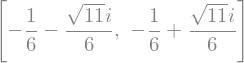


¿La derivada existe para todo x? Sí, es un polinomio.

Análisis detallado:


In [5]:
# Definir variable y función
x = sp.Symbol('x')
f = 2*x**3 + x**2 + 2*x

print("Función:")
display(f)

# Calcular primera derivada
f_prime = sp.diff(f, x)
print("\nPrimera derivada:")
display(f_prime)

# Encontrar puntos críticos (donde f'(x) = 0)
critical_points = sp.solve(f_prime, x)
print("\nPuntos críticos (f'(x) = 0):")
display(critical_points)

# Verificar si la derivada existe en todo el dominio
print("\n¿La derivada existe para todo x? Sí, es un polinomio.")

# Análisis de los puntos críticos
if critical_points:
    print("\nAnálisis detallado:")
    for point in critical_points:
        if point.is_real:
            print(f"  • x = {point} = {float(point.evalf()):.4f}")
else:
    print("\n✓ No hay números críticos reales")

### b) $h(t) = t^{3/4} - 2t^{1/4}$

Función:



Primera derivada:


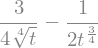

Simplificada:


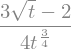


Puntos críticos (h'(t) = 0):



⚠️  La derivada no existe en t = 0 (también es punto crítico)

Todos los números críticos:
  • t = 0 (derivada no existe)
  • t = 4/9 = 0.4444


In [6]:
# Definir variable y función
t = sp.Symbol('t', real=True, positive=True)
h = t**(sp.Rational(3,4)) - 2*t**(sp.Rational(1,4))

print("Función:")
display(h)

# Calcular primera derivada
h_prime = sp.diff(h, t)
print("\nPrimera derivada:")
display(h_prime)
print("Simplificada:")
display(sp.simplify(h_prime))

# Encontrar puntos críticos
critical_points_h = sp.solve(h_prime, t)
print("\nPuntos críticos (h'(t) = 0):")
display(critical_points_h)

# Verificar donde la derivada no existe
print("\n⚠️  La derivada no existe en t = 0 (también es punto crítico)")

print("\nTodos los números críticos:")
print("  • t = 0 (derivada no existe)")
for point in critical_points_h:
    if point.is_real and point >= 0:
        print(f"  • t = {point} = {float(point.evalf()):.4f}")

## Ejemplo 3: Valores máximo y mínimo absoluto en intervalo

### a) $f(x) = 3x^2 - 12x + 5$ en $[0,3]$

In [7]:
# Definir función
x = sp.Symbol('x')
f = 3*x**2 - 12*x + 5
a, b = 0, 3

print(f"Función: f(x) = {f}")
print(f"Intervalo: [{a}, {b}]")
print("="*50)

# Paso 1: Encontrar números críticos
f_prime = sp.diff(f, x)
critical = sp.solve(f_prime, x)
critical_in_interval = [c for c in critical if c.is_real and a <= c <= b]

print("\n1. Primera derivada:")
display(f_prime)
print(f"\n   Puntos críticos en [{a},{b}]: {critical_in_interval}")

# Paso 2: Evaluar en puntos críticos y extremos
print("\n2. Evaluación en puntos críticos y extremos:")
points_to_evaluate = [a] + critical_in_interval + [b]
values = {}

for point in points_to_evaluate:
    value = float(f.subs(x, point).evalf())
    values[float(point)] = value
    print(f"   f({point}) = {value}")

# Paso 3: Determinar máximo y mínimo absoluto
max_point = max(values, key=values.get)
min_point = min(values, key=values.get)

print("\n3. Conclusión:")
print(f"   ✓ Máximo absoluto: f({max_point}) = {values[max_point]}")
print(f"   ✓ Mínimo absoluto: f({min_point}) = {values[min_point]}")

Función: f(x) = 3*x**2 - 12*x + 5
Intervalo: [0, 3]

1. Primera derivada:



   Puntos críticos en [0,3]: [2]

2. Evaluación en puntos críticos y extremos:
   f(0) = 5.0
   f(2) = -7.0
   f(3) = -4.0

3. Conclusión:
   ✓ Máximo absoluto: f(0.0) = 5.0
   ✓ Mínimo absoluto: f(2.0) = -7.0


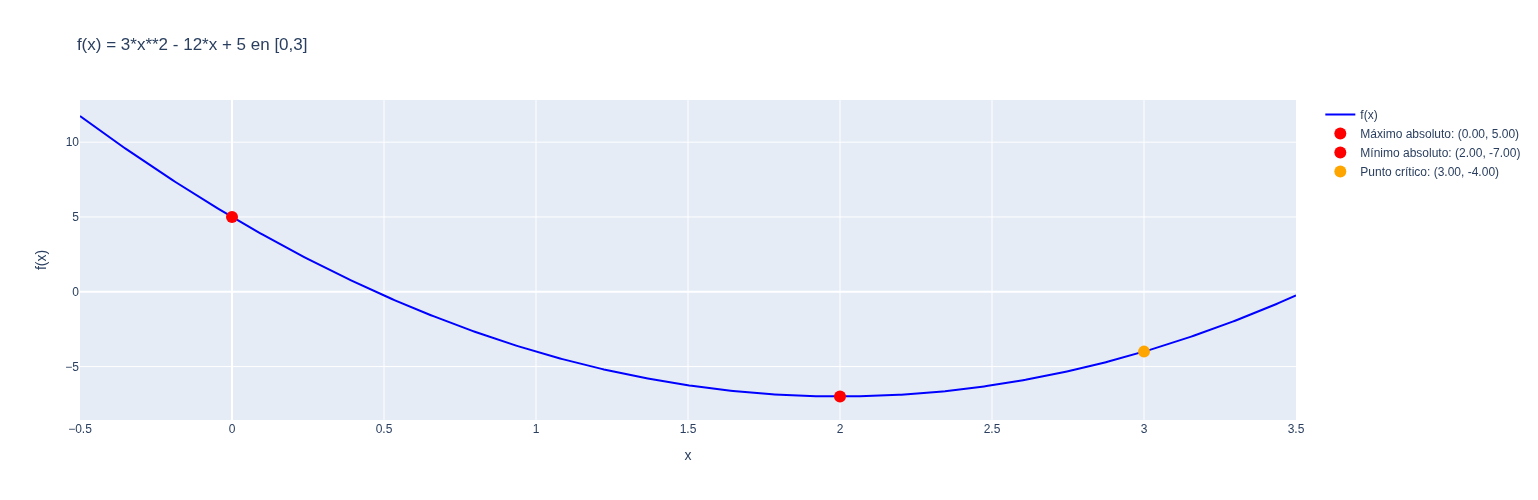

In [8]:
# Visualización
x_vals = np.linspace(a-0.5, b+0.5, 500)
f_lambda = sp.lambdify(x, f, 'numpy')
y_vals = f_lambda(x_vals)

fig = go.Figure()

# Función
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, name='f(x)', 
                         line=dict(color='blue', width=2)))

# Marcar puntos evaluados
for point, value in values.items():
    color = 'red' if point in [max_point, min_point] else 'orange'
    label = ''
    if point == max_point:
        label = 'Máximo absoluto'
    elif point == min_point:
        label = 'Mínimo absoluto'
    else:
        label = 'Punto crítico'
    
    fig.add_trace(go.Scatter(x=[point], y=[value], mode='markers',
                            marker=dict(size=12, color=color),
                            name=f'{label}: ({point:.2f}, {value:.2f})'))

fig.update_layout(title=f'f(x) = {f} en [{a},{b}]',
                  xaxis_title='x', yaxis_title='f(x)',
                  height=500)
fig.show()

### b) $f(x) = 2x^3 - 3x^2 - 12x + 1$ en $[-2,3]$

In [ ]:
# Definir función y el intervalo
x = sp.Symbol('x')
f = 2*x**3 - 3*x**2 - 12*x + 1
a, b = -2, 3

print(f"Función: f(x) = {f}")
print(f"Intervalo: [{a}, {b}]")
print("="*50)

# Paso 1: Encontrar números críticos
f_prime = sp.diff(f, x)
critical = sp.solve(f_prime, x)
critical_in_interval = [c for c in critical if c.is_real and a <= c <= b]

print("\n1. Primera derivada:")
display(f_prime)
print(f"\n   Puntos críticos en [{a},{b}]: {critical_in_interval}")

# Paso 2: Evaluar en puntos críticos y extremos
print("\n2. Evaluación en puntos críticos y extremos:")
points_to_evaluate = [a] + critical_in_interval + [b]
values = {}

for point in points_to_evaluate:
    value = float(f.subs(x, point).evalf())
    values[float(point)] = value
    print(f"   f({point}) = {value}")

# Paso 3: Determinar máximo y mínimo absoluto
max_point = max(values, key=values.get)
min_point = min(values, key=values.get)

print("\n3. Conclusión:")
print(f"   ✓ Máximo absoluto: f({max_point}) = {values[max_point]}")
print(f"   ✓ Mínimo absoluto: f({min_point}) = {values[min_point]}")

In [ ]:
# Visualización
x_vals = np.linspace(a-0.5, b+0.5, 500)
f_lambda = sp.lambdify(x, f, 'numpy')
y_vals = f_lambda(x_vals)

fig = go.Figure()

# Función
fig.add_trace(go.Scatter(x=x_vals, y=y_vals, name='f(x)', 
                         line=dict(color='blue', width=2)))

# Marcar puntos evaluados
for point, value in values.items():
    color = 'red' if point in [max_point, min_point] else 'orange'
    label = ''
    if point == max_point:
        label = 'Máximo absoluto'
    elif point == min_point:
        label = 'Mínimo absoluto'
    else:
        label = 'Punto crítico'
    
    fig.add_trace(go.Scatter(x=[point], y=[value], mode='markers',
                            marker=dict(size=12, color=color),
                            name=f'{label}: ({point:.2f}, {value:.2f})'))

# Marcar intervalo
fig.add_vline(x=a, line_dash="dash", line_color="gray", annotation_text=f"x={a}")
fig.add_vline(x=b, line_dash="dash", line_color="gray", annotation_text=f"x={b}")

fig.update_layout(title=f'f(x) = {f} en [{a},{b}]',
                  xaxis_title='x', yaxis_title='f(x)',
                  height=500)
fig.show()

## Ejercicios Adicionales

### Ejercicio 4: Función con raíces fraccionarias
$f(x) = x + \frac{4}{x}$ en $[0.5, 4]$